In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [4]:
df = pd.read_csv('Data/Wage.csv', index_col=0)
print(df.shape)
df.head()

(3000, 12)


,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [36]:
X = df[["age"]]
y = df["wage"]

<AxesSubplot:xlabel='age', ylabel='wage'>

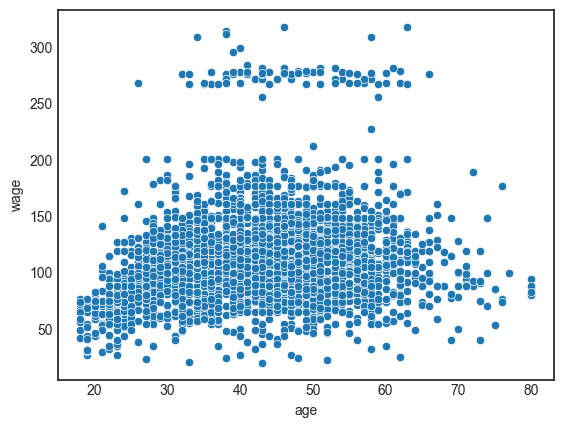

In [37]:
sns.scatterplot(x="age", y="wage", data=df)

In [38]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.linear_model import LinearRegression

pip = make_pipeline(
    PolynomialFeatures(),
    LinearRegression()
)
pip

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [39]:
pip.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression(),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': 'deprecated',
 'linearregression__positive': False}

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "polynomialfeatures__degree": np.arange(1, 10)
}

gs = GridSearchCV(pip, param_grid, scoring="r2").fit(X, y)

In [48]:
gs.score(X, y), gs.best_params_

(0.08626467292034312, {'polynomialfeatures__degree': 4})

C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


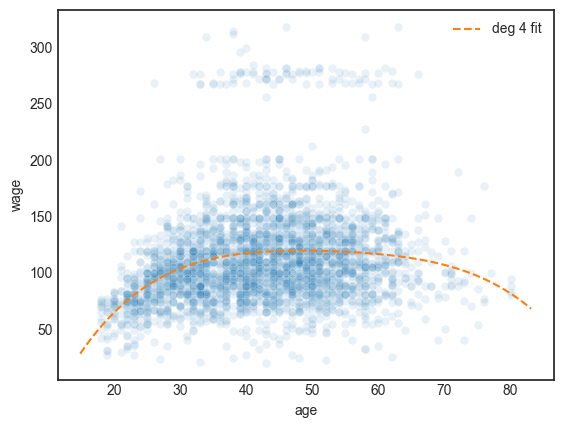

In [47]:
f, ax = plt.subplots(1, 1)

sns.scatterplot(x="age", y="wage", data=df, ax=ax, alpha=0.1)
ix = np.linspace(*ax.get_xlim(), num=100)
plt.plot(ix, gs.predict(ix.reshape(-1, 1)), ls='--', color="tab:orange", label="deg 4 fit")
ax.legend()

In [50]:
spline_pip = make_pipeline(
    SplineTransformer(),
    LinearRegression()
)
spline_pip.get_params()

{'memory': None,
 'steps': [('splinetransformer', SplineTransformer()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'splinetransformer': SplineTransformer(),
 'linearregression': LinearRegression(),
 'splinetransformer__degree': 3,
 'splinetransformer__extrapolation': 'constant',
 'splinetransformer__include_bias': True,
 'splinetransformer__knots': 'uniform',
 'splinetransformer__n_knots': 5,
 'splinetransformer__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': 'deprecated',
 'linearregression__positive': False}

In [96]:
spline_param_grid = {
    'splinetransformer__degree': [0],
    'splinetransformer__knots': ['uniform', 'quantile'],
    'splinetransformer__n_knots': np.arange(2, 10),
}

spline_gs = GridSearchCV(spline_pip, spline_param_grid, scoring="r2").fit(X, y)
spline_gs.score(X, y), spline_gs.best_params_, spline_gs.predict(X.iloc[:5, [0]])

(0.08447348019018364,
 {'splinetransformer__degree': 0,
  'splinetransformer__knots': 'uniform',
  'splinetransformer__n_knots': 9},
 array([ 76.296875  ,  76.296875  , 119.66796875, 119.66796875,
        116.8125    ]))

C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SplineTransformer was fitted with feature names
  warnings.warn(


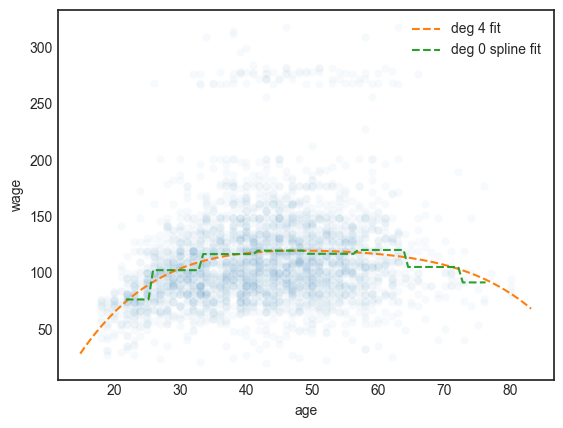

In [145]:
f, ax = plt.subplots(1, 1)

sns.scatterplot(x="age", y="wage", data=df, ax=ax, alpha=0.03)
ix = np.linspace(*ax.get_xlim(), num=100)
plt.plot(ix, gs.predict(ix.reshape(-1, 1)), ls='--', color="tab:orange", label="deg 4 fit")

plt.plot(ix[10:90], spline_gs.predict(ix[10:90].reshape(-1, 1)), ls='--', color="tab:green", label="deg 0 spline fit")
ax.legend()

## Including additional predictors

In [154]:
df.shape, df["sex"].value_counts(), df["region"].value_counts(),

((3000, 12),
 1. Male    3000
 Name: sex, dtype: int64,
 2. Middle Atlantic    3000
 Name: region, dtype: int64)

In [155]:
num_vars = ["age"]
cat_vars = [
    "maritl", "race", 
    "education", "jobclass", 
    "health", "health_ins"
]
X = df[num_vars + cat_vars]
y = df["wage"]

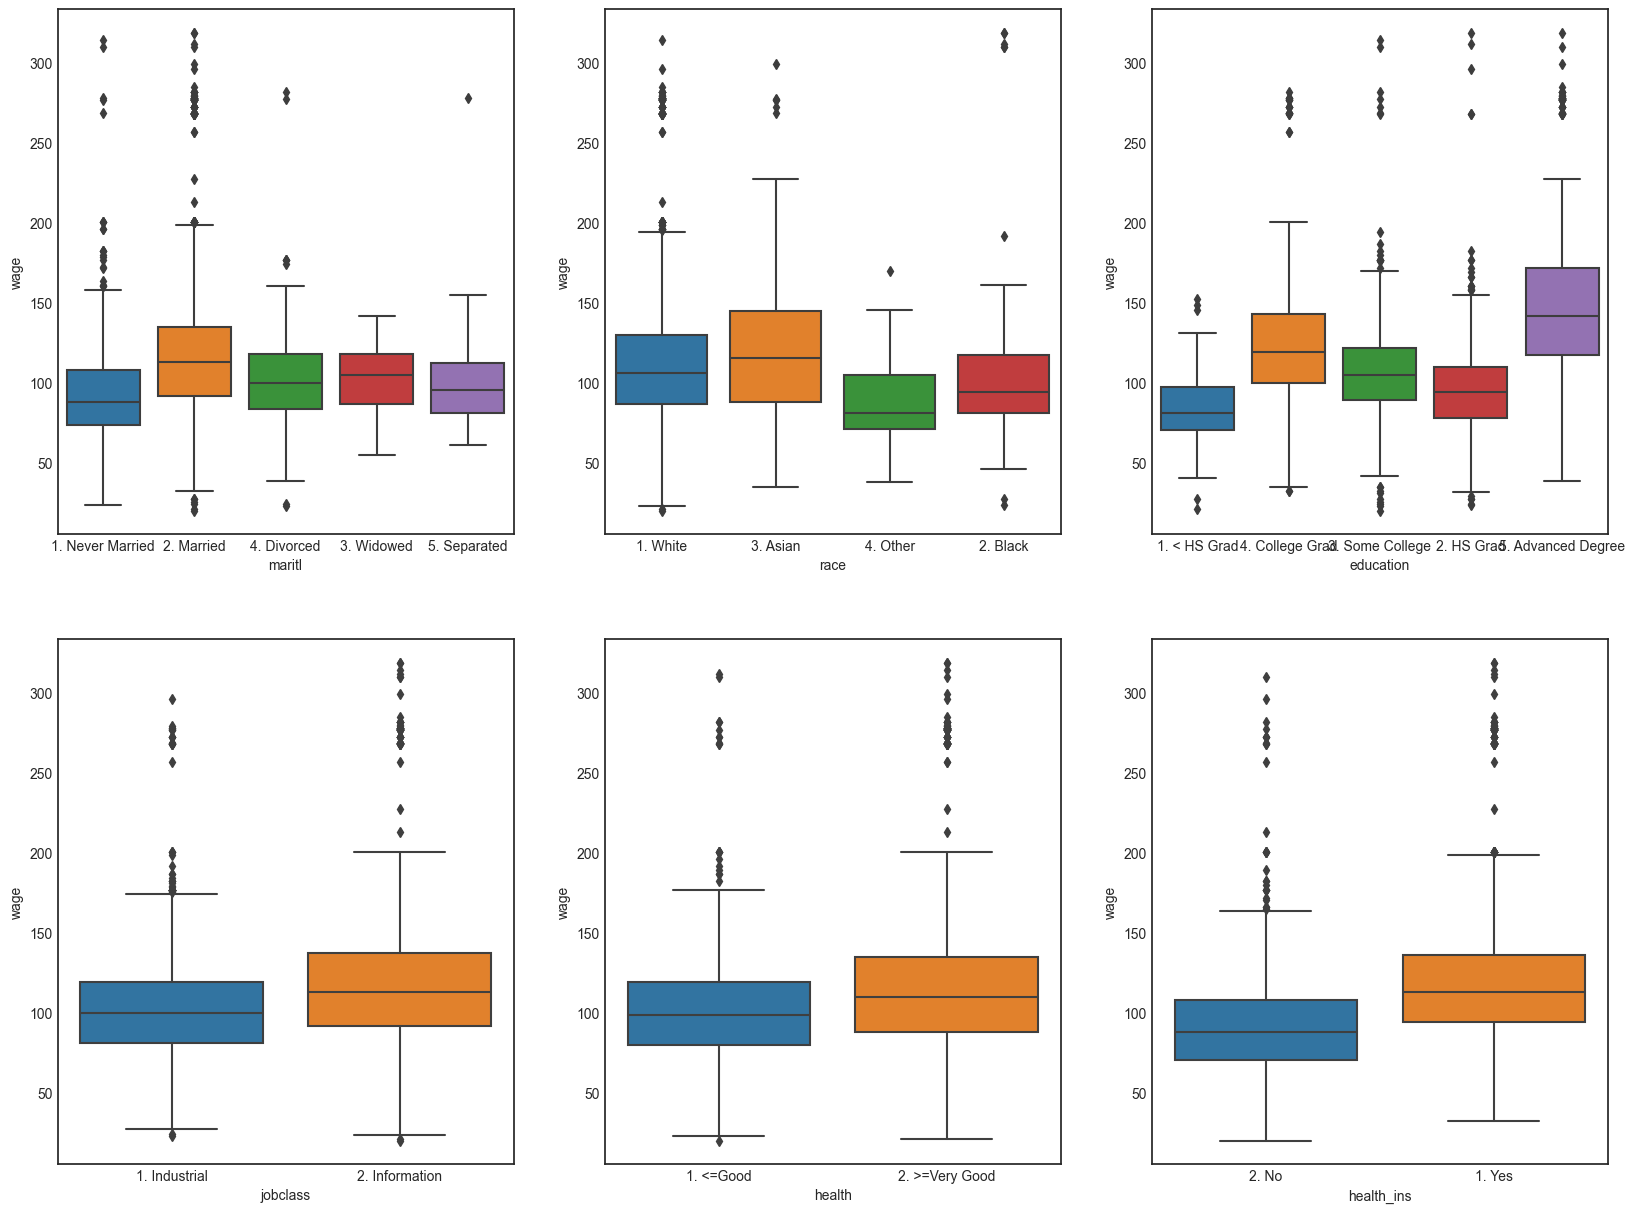

In [157]:
f, axs = plt.subplots(2, 3, figsize=(20, 15))
axs = axs.ravel()

for ax, cat in zip(axs, cat_vars):
    sns.boxplot(data=df, x=cat, y="wage", ax=ax)

In [161]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    drop="first",
    sparse=False,
    handle_unknown="ignore"
)
    
pip = make_pipeline(
    make_column_transformer(
        (ohe, cat_vars),
        (SplineTransformer(), num_vars)
    ),
    LinearRegression()
)
pip.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse=False),
                                    ['maritl', 'race', 'education', 'jobclass',
                                     'health', 'health_ins']),
                                   ('splinetransformer', SplineTransformer(),
                                    ['age'])])),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse=False),
                                  ['maritl', 'race', 'education', 'jobclass',
           

In [189]:
grid_params = {
    'columntransformer__splinetransformer__degree': np.arange(4),
    'columntransformer__splinetransformer__knots': ['uniform', "quantile"],
    'columntransformer__splinetransformer__n_knots': np.arange(2, 10),
}
gs = GridSearchCV(pip, param_grid=grid_params, scoring="r2").fit(X, y)
gs.score(X, y), gs.best_params_

(0.3469560658775849,
 {'columntransformer__splinetransformer__degree': 1,
  'columntransformer__splinetransformer__knots': 'uniform',
  'columntransformer__splinetransformer__n_knots': 4})

C:\Users\леопольд\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SplineTransformer was fitted with feature names
  warnings.warn(


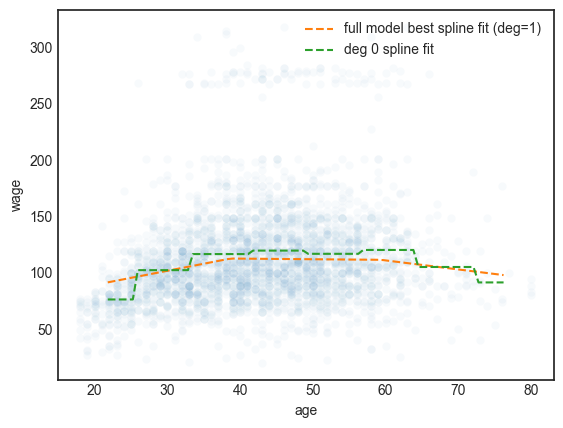

In [192]:
f, ax = plt.subplots(1, 1)

def get_most_frequent_cat_name(df, cat):
    return df[cat].value_counts().sort_values(ascending=False).index[0]

sns.scatterplot(x="age", y="wage", data=df, ax=ax, alpha=0.03)

ix = np.linspace(*ax.get_xlim(), num=100)

to_pred = pd.DataFrame({
    "age": ix[10:90],
} | { cat:get_most_frequent_cat_name(df, cat) for cat in cat_vars })
plt.plot(
    ix[10:90],
    gs.predict(to_pred), 
    ls='--', 
    color="tab:orange", 
    label="full model best spline fit (deg=1)"
)

plt.plot(ix[10:90], spline_gs.predict(ix[10:90].reshape(-1, 1)), ls='--', color="tab:green", label="deg 0 spline fit")
ax.legend()